In [1]:
import pandas as pd
import numpy as np

# Visualizatin library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore,normaltest
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Here, W is our target variable.

In [3]:
data.shape

(30, 17)

In [4]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No null values

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Given dataset has only integer values.
No missing values are there in trhe given dataset.

In [7]:
# Check for duplicate rows

dup_data = data[data.duplicated()]
dup_data.shape

(0, 17)

There are no dupicated rows

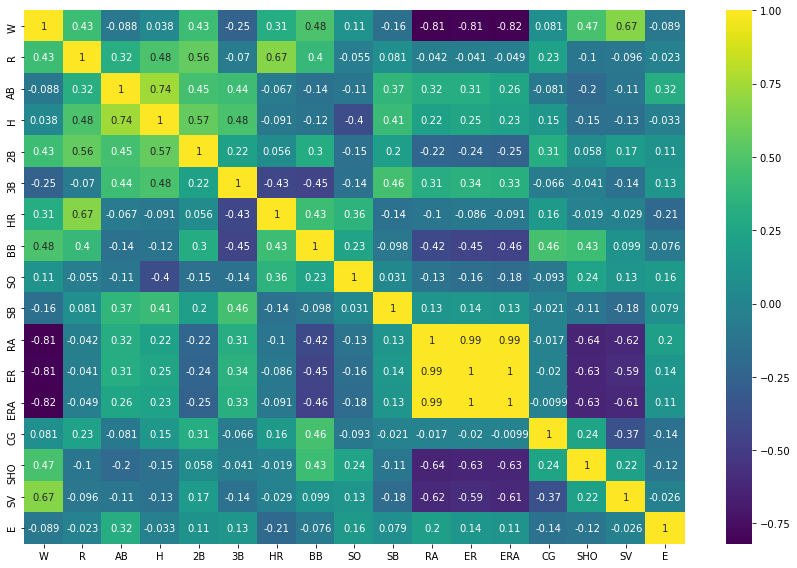

In [9]:
#Since there are no null values check correlation of data
#Lets check it with Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='viridis',annot=True)
plt.tight_layout()
plt.show()

From above plot:
-ER-ERA are highly correlated
-there is significant correlation between W and SV,ER,RA,ERA

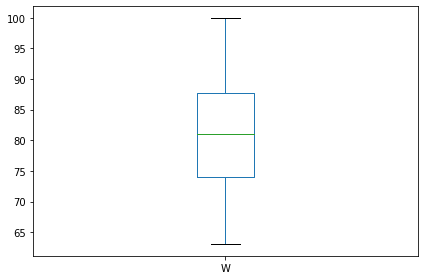

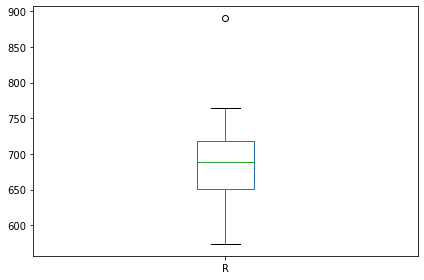

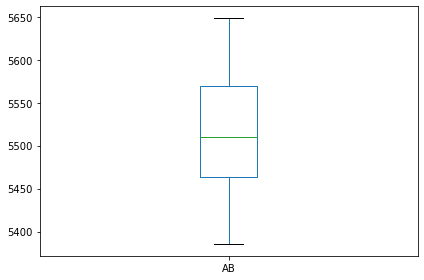

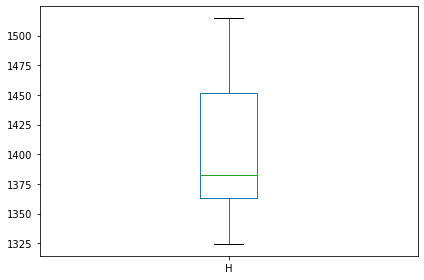

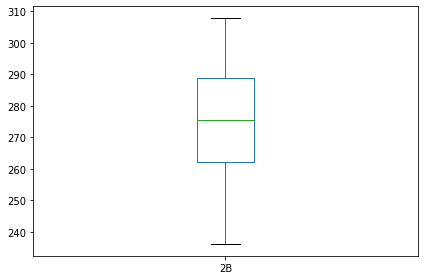

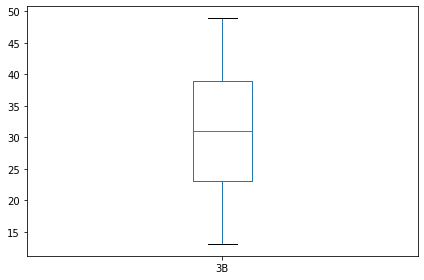

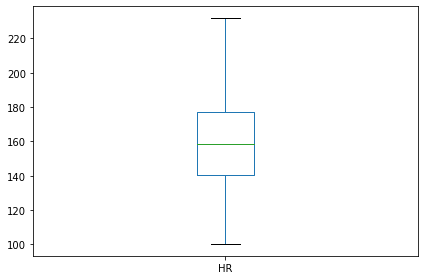

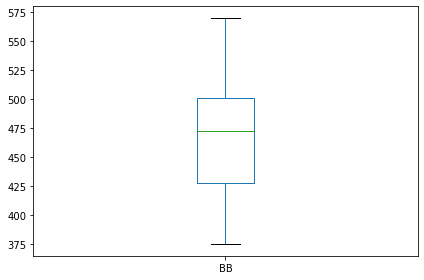

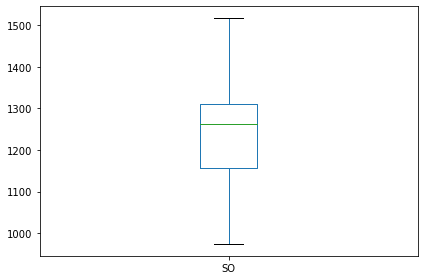

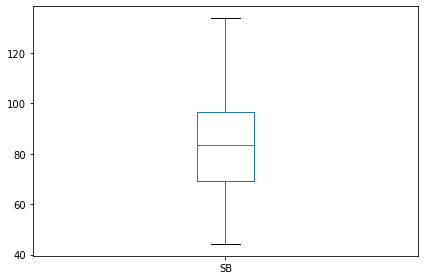

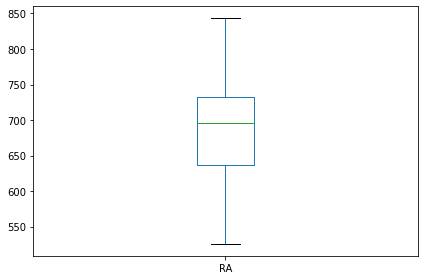

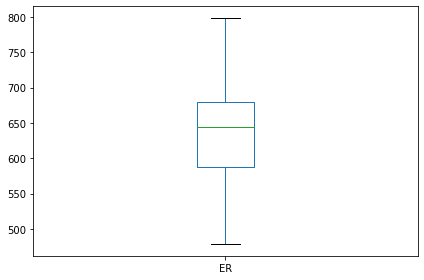

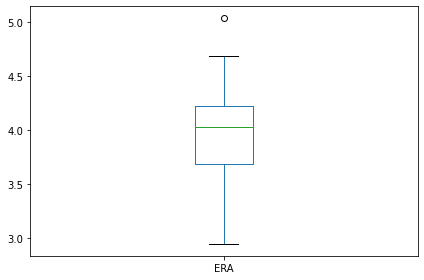

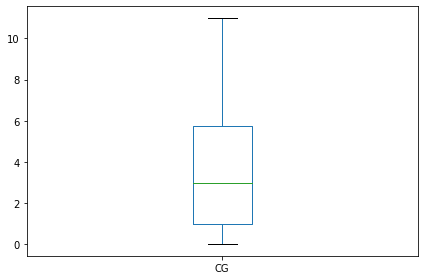

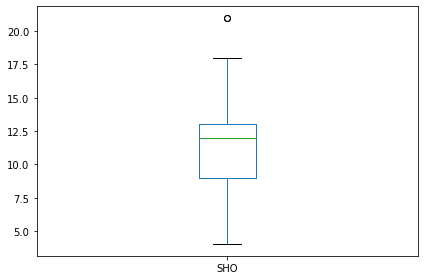

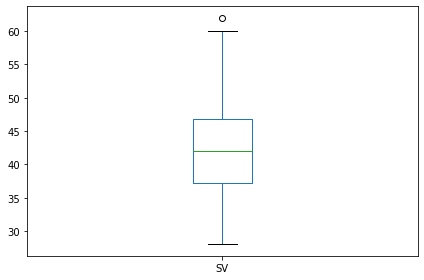

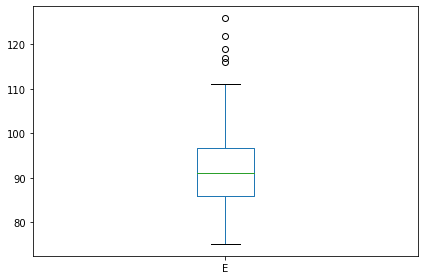

In [10]:
for i,col in enumerate(list(data.columns.values)):
    
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

FEATURE ENGENEERING :

In [11]:
# treating outliers:

from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [12]:
data_z = data[(z<3).all(axis=1)]
data_z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [13]:
# checking how much data is lost:
data_loss=((30-29)/30)*100
data_loss

3.3333333333333335

3% data loss is bearable

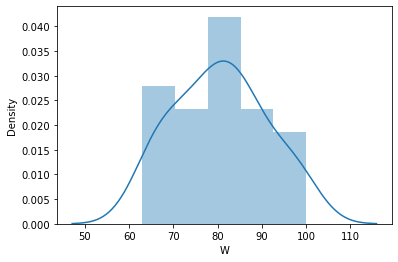

In [16]:
##  1.'W' - No. of predicted wins

sns.distplot(data_z['W'])
plt.show()

It is the target variable of this study
The distribution of the observations in this column follows normal distribution.

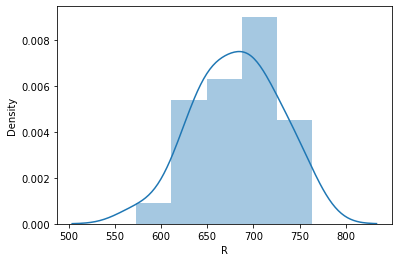

In [17]:
##  2.'R' - Runs scored in a season

sns.distplot(data_z['R'])
plt.show()

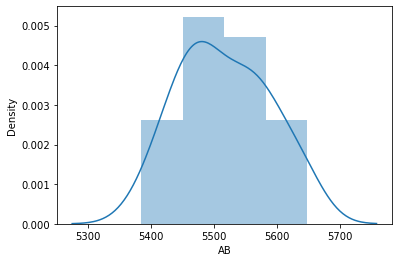

In [19]:
###  3.'AB' - the total number of at bat stats by sum of all player's 

sns.distplot(data_z['AB'])
plt.show()

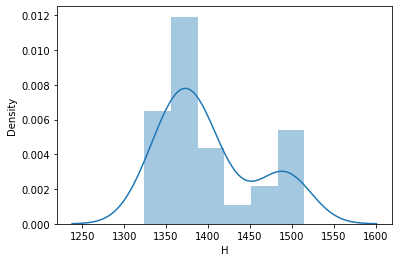

In [20]:
## 4.'H' - total hits in the season

sns.distplot(data_z['H'])
plt.show()

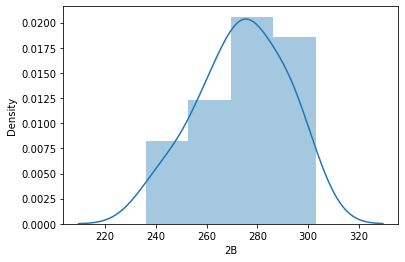

In [21]:
## 5. '2B' - total number of double bases by a team in a season

sns.distplot(data_z['2B'])
plt.show()

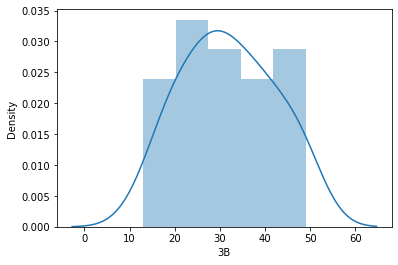

In [22]:
## 6. '3B' - total number of third bases by a team in a season

sns.distplot(data_z['3B'])
plt.show()

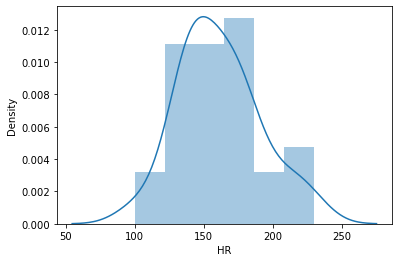

In [23]:
## 7. 'HR' - total number of Home Runs by a team in a season

sns.distplot(data_z['HR'])
plt.show()

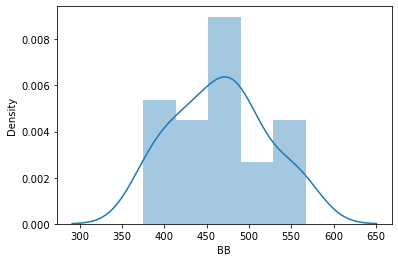

In [24]:
## 8. 'BB' - total number of walks for a team in a season

sns.distplot(data_z['BB'])
plt.show()

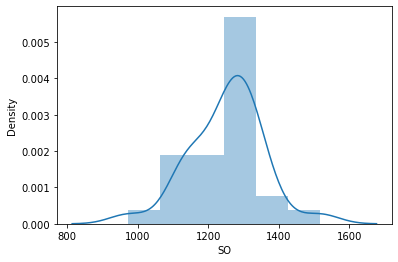

In [25]:
## 9. 'SO' - total number batters getting out for a team in a season

sns.distplot(data_z['SO'])
plt.show()

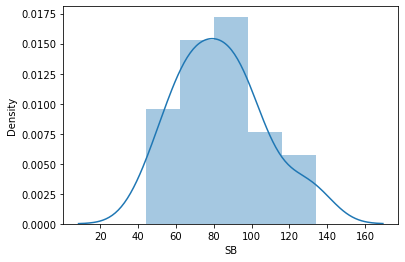

In [26]:
## 10. 'SB' - total number of stolen bases by a team in a season

sns.distplot(data_z['SB'])
plt.show()

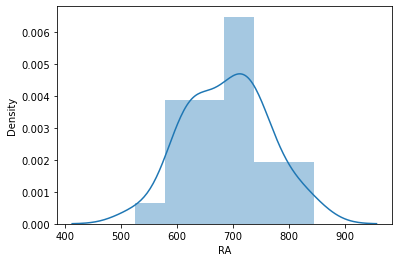

In [27]:
## 11. 'RA - total number of runs allowed by all pitchers in a team in a season

sns.distplot(data_z['RA'])
plt.show()


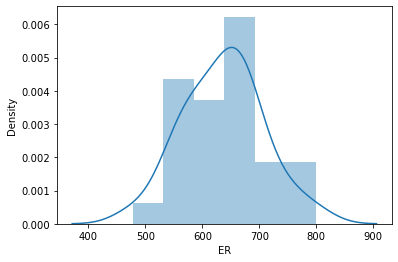

In [28]:
# 12. 'ER' - total number of earned runs for a team in a season
sns.distplot(data['ER'])
plt.show()

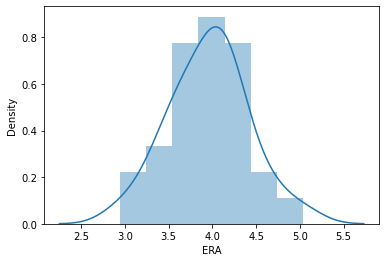

In [29]:
#13. 'ERA' - total number of earned runs average for a team in a season

sns.distplot(data['ERA'])
plt.show()

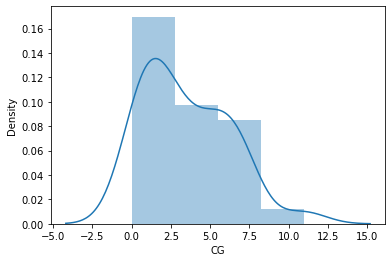

In [30]:
# 14. 'CG'
sns.distplot(data['CG'])
plt.show()

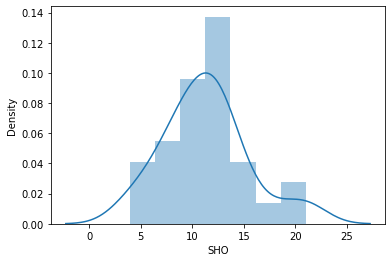

In [31]:
# 15. 'SHO' - total number of shutouts by a team in a season

sns.distplot(data['SHO'])
plt.show()

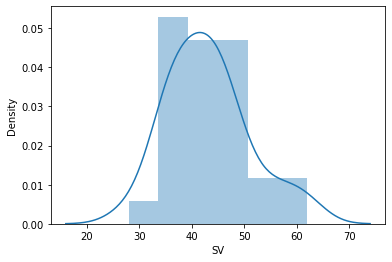

In [32]:
# 16. 'SV' - total number of saves by a team in a season

sns.distplot(data['SV'])
plt.show()

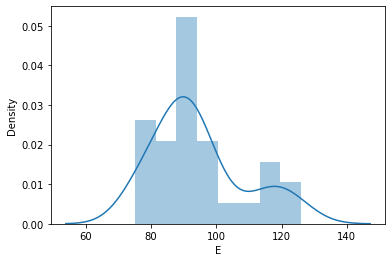

In [33]:
# 17. 'E' - total number of errors by a team in a season

sns.distplot(data['E'])
plt.show()

Checking the pattern of 'W' with respect to different features of the dataset.

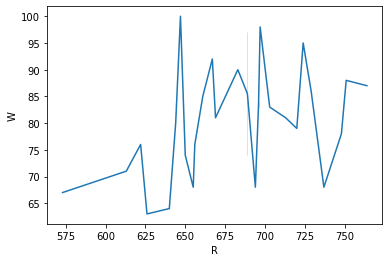

In [51]:
#Lets check the how Run is changing with respect to Win
sns.lineplot(data_z["R"],data_z["W"])
plt.show()

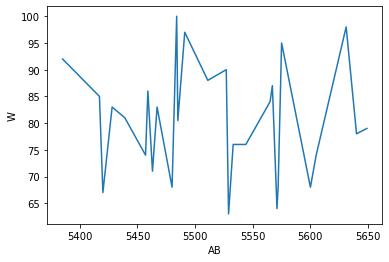

In [52]:
#Lets check the how At Bat is changing with respect to Win
sns.lineplot(data_z["AB"],data_z["W"])
plt.show()

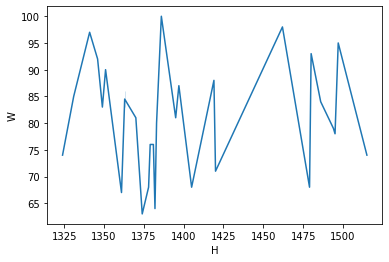

In [37]:
#Lets check the how Hits is changing with respect to Win
sns.lineplot(data_z["H"],data_z["W"])
plt.show()

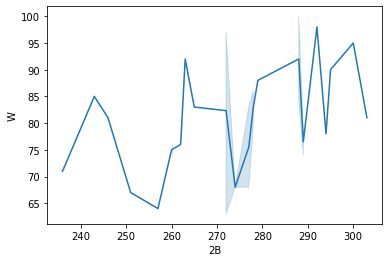

In [53]:
#Lets check the how Doubles is changing with respect to Win
sns.lineplot(data_z["2B"],data_z["W"])
plt.show()

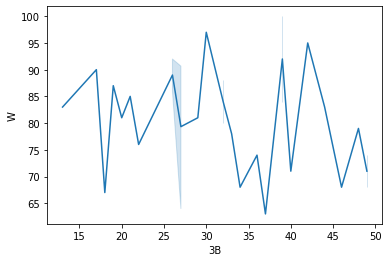

In [54]:
#Lets check the how Triples is changing with respect to Win
sns.lineplot(data_z["3B"],data_z["W"])
plt.show()

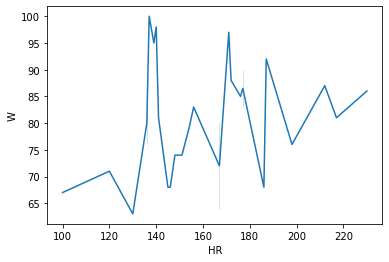

In [55]:
#Lets check the how Homeruns is changing with respect to Win
sns.lineplot(data_z["HR"],data_z["W"])
plt.show()

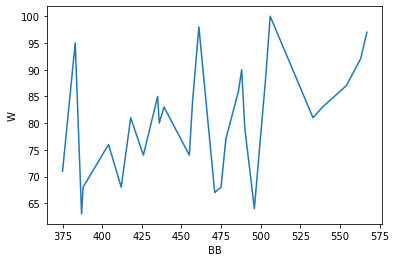

In [56]:
#Lets check the how Walks is changing with respect to Win
sns.lineplot(data_z["BB"],data_z["W"])
plt.show()

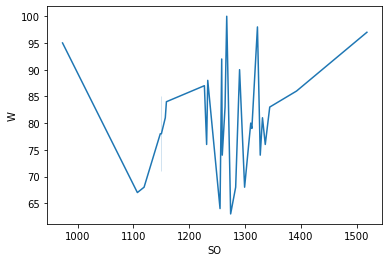

In [57]:
#Lets check the how Strikeouts is changing with respect to Win
sns.lineplot(data_z["SO"],data_z["W"])
plt.show()

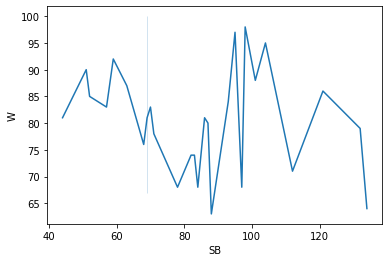

In [58]:
#Lets check the how Stolen Bases is changing with respect to Win
sns.lineplot(data_z["SB"],data_z["W"])
plt.show()

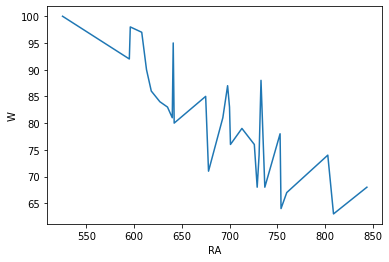

In [59]:
#Lets check the how Runs Allowed is changing with respect to Win
sns.lineplot(data_z["RA"],data_z["W"])
plt.show()
##The below graph  shows that with increase in Runs Allowed has a reverse impact on win


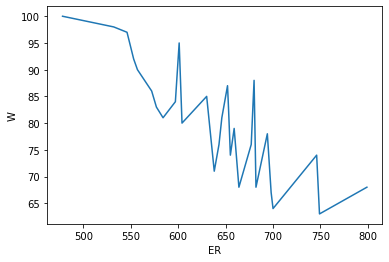

In [60]:
#Lets check the how Earened Run is changing with respect to Win
sns.lineplot(data_z["ER"],data_z["W"])
plt.show()

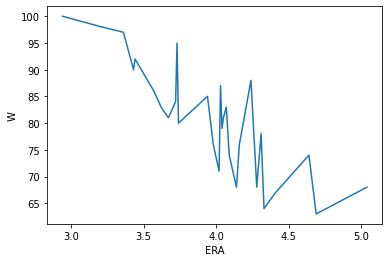

In [61]:
#Lets check the how Earened Run Average is changing with respect to Win
sns.lineplot(data_z["ERA"],data_z["W"])
plt.show()

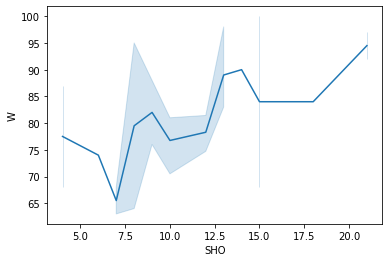

In [62]:
#Lets check the how Shutouts is changing with respect to Win
sns.lineplot(data_z["SHO"],data_z["W"])
plt.show()

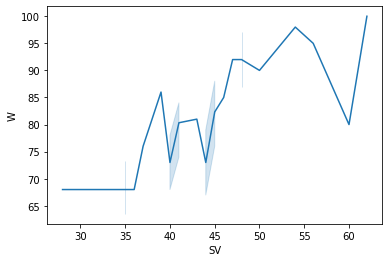

In [63]:
#Lets check the how Saves is changing with respect to Win
sns.lineplot(data_z["SV"],data_z["W"])
plt.show()

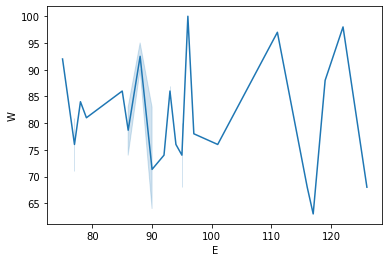

In [64]:
#Lets check the how Erros is changing with respect to Win
sns.lineplot(data_z["E"],data_z["W"])
plt.show()

In [65]:
data_z.shape

(29, 17)

In [66]:
#seperating target variable and predictors col:
x = data_z.drop(['W'],axis=1)
y = data_z.W

In [67]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [68]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [69]:
data_1 = data_z.drop(['W'],axis=1)

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=data_1.columns)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size = .20)

In [72]:
max_r_score=0

for r_state in range(42,100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size = .20)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,pred)
    
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state= r_state
print("max r2 score to ", final_r_state,"is", max_r_score)

max r2 score to  42 is 0.7555241414909606


In [73]:
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 5.293708031395842
mean squared error: 34.14512823842917
root mean squred error: 5.843383286969046


In [74]:
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LinearRegression(),x,y,cv=5,scoring ="r2")
a_score

array([ 0.7557458 , -0.67830114,  0.66816769, -0.25396453, -0.30350451])

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [76]:
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.001, 'n_estimators': 250}

In [77]:
ls = Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9649098788802268

In [78]:
Linearmodel = linear_model.LinearRegression()
Linearmodel.fit(x_train, y_train)
print(r2_score(y_train, Linearmodel.predict(x_train)))
print(mean_squared_error(y_train, Linearmodel.predict(x_train)))

0.9693516004448701
2.8853527308971283


In [79]:
print(r2_score(y_test,Linearmodel.predict(x_test)))
print(mean_squared_error(y_test,Linearmodel.predict(x_test)))

0.7555241414909606
34.14512823842917


Linear Regression

In [82]:
Linearmodel = linear_model.LinearRegression()
Linearmodel.fit(x_train, y_train)
print(r2_score(y_train, Linearmodel.predict(x_train)))
print(mean_squared_error(y_train, Linearmodel.predict(x_train)))

0.9693516004448701
2.8853527308971283


In [83]:
print(r2_score(y_test,Linearmodel.predict(x_test)))
print(mean_squared_error(y_test,Linearmodel.predict(x_test)))

0.7555241414909606
34.14512823842917


Decision Tree

In [84]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
print(r2_score(y_train,dt.predict(x_train)))
print(mean_squared_error(y_train,dt.predict(x_train)))

1.0
0.0


In [86]:
print(r2_score(y_test,dt.predict(x_test)))
print(mean_squared_error(y_test,dt.predict(x_test)))

0.017899761336515496
137.16666666666666


Random forest

In [87]:
random_model = RandomForestRegressor()
random_model.fit(x_train, y_train)
print(r2_score(y_train, random_model.predict(x_train)))
print(mean_squared_error(y_train,random_model.predict(x_train)))

0.9444297056343118
5.231591304347831


In [88]:
print(r2_score(y_test, random_model.predict(x_test)))
print(mean_squared_error(y_test,random_model.predict(x_test)))

0.7018467780429596
41.64206666666664


Hyperparameter tuning and cross validaing before selecting final model

In [89]:
params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid_search_rf = GridSearchCV(random_model, params, cv = 3)

In [90]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100, 200]})

In [91]:
print(r2_score(y_train, grid_search_rf.predict(x_train)))
print(mean_squared_error(y_train,grid_search_rf.predict(x_train)))

0.9205201799124534
7.482521739130431


In [92]:
print(r2_score(y_test, grid_search_rf.predict(x_test)))
print(mean_squared_error(y_test,grid_search_rf.predict(x_test)))

0.6892701670644391
43.39860000000001


In [93]:
random_model.fit(x_train, y_train)
print(r2_score(y_train, random_model.predict(x_train)))
print(mean_squared_error(y_train,random_model.predict(x_train)))

0.9283422673788202
6.746121739130432


In [94]:
print(r2_score(y_test, random_model.predict(x_test)))
print(mean_squared_error(y_test,grid_search_rf.predict(x_test)))

0.7290766109785203
43.39860000000001


From above, it is clear that linear regression perform best followed by random forest.
Decision tree perform least in test dataset. One possible reason for random forest not performing better than linear regression is that the size of the dataset is small.

Hence, Linear Regression model is of best fit.